# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Each student will have their own username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=7f2a264adb4a4315275b8aa121aa59939aa1a1fddafa4452cce20d4f0236623a
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "afrozshah"
kaggle_key = "92b45115ae2b476641222c3cbb00ca07"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [14]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# If you already downloaded it you can use the -o command to overwrite the file
!kaggle competitions download -c bike-sharing-demand



  0% 0.00/189k [00:00<?, ?B/s]

100% 189k/189k [00:00<00:00, 87.5MB/s]


In [16]:
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [17]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [53]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [41]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [21]:
predictor = TabularPredictor(label="count", eval_metric="rmse").fit(train_data=train.drop(['casual' , 'registered'], axis=1), time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230616_143542/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230616_143542/"
AutoGluon Version:  0.8.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   85.25 GB / 115.66 GB (73.7%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of:

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.leaderboard()

### Create predictions from test dataset

In [36]:
predictions = predictor.predict(test)
predictions

0        23.136723
1        41.342533
2        45.516357
3        48.602978
4        51.423233
           ...    
6488    159.101624
6489    159.139008
6490    154.849823
6491    149.398422
6492    149.696747
Name: count, Length: 6493, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [37]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.792023
std        90.196831
min         3.020683
25%        20.215731
50%        63.630962
75%       168.652496
max       364.697815
Name: count, dtype: float64

In [38]:
negative_pred_count = (predictions < 0).sum()

# Counting the positive predictions
positive_pred_count = (predictions >= 0).sum()

print("Total predictions                :", len(predictions))
print("Total positive predictions  :", positive_pred_count)
print("Total negative predictions  :", negative_pred_count)

Total predictions                : 6493
Total positive predictions  : 6493
Total negative predictions  : 0


In [34]:
import numpy as np


In [39]:
# Set negative predictions to zero
predictions = np.maximum(predictions, 0)

# Count negative predictions
pred_neg_count = (predictions < 0).sum()

print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [42]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 397kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-06-16 15:09:29  first raw submission                 complete  1.80210      1.80210       
submission_new_hpo1.csv      2023-06-13 17:41:49  new features with hyperparameters 1  complete  0.49469      0.49469       
submission_new_hpo.csv       2023-06-13 17:36:29  new features with hyperparameters    complete  0.55438      0.55438       
submission_new_features.csv  2023-06-13 17:29:55  new features                         complete  0.45049      0.45049       


Initial score of `1.8020`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

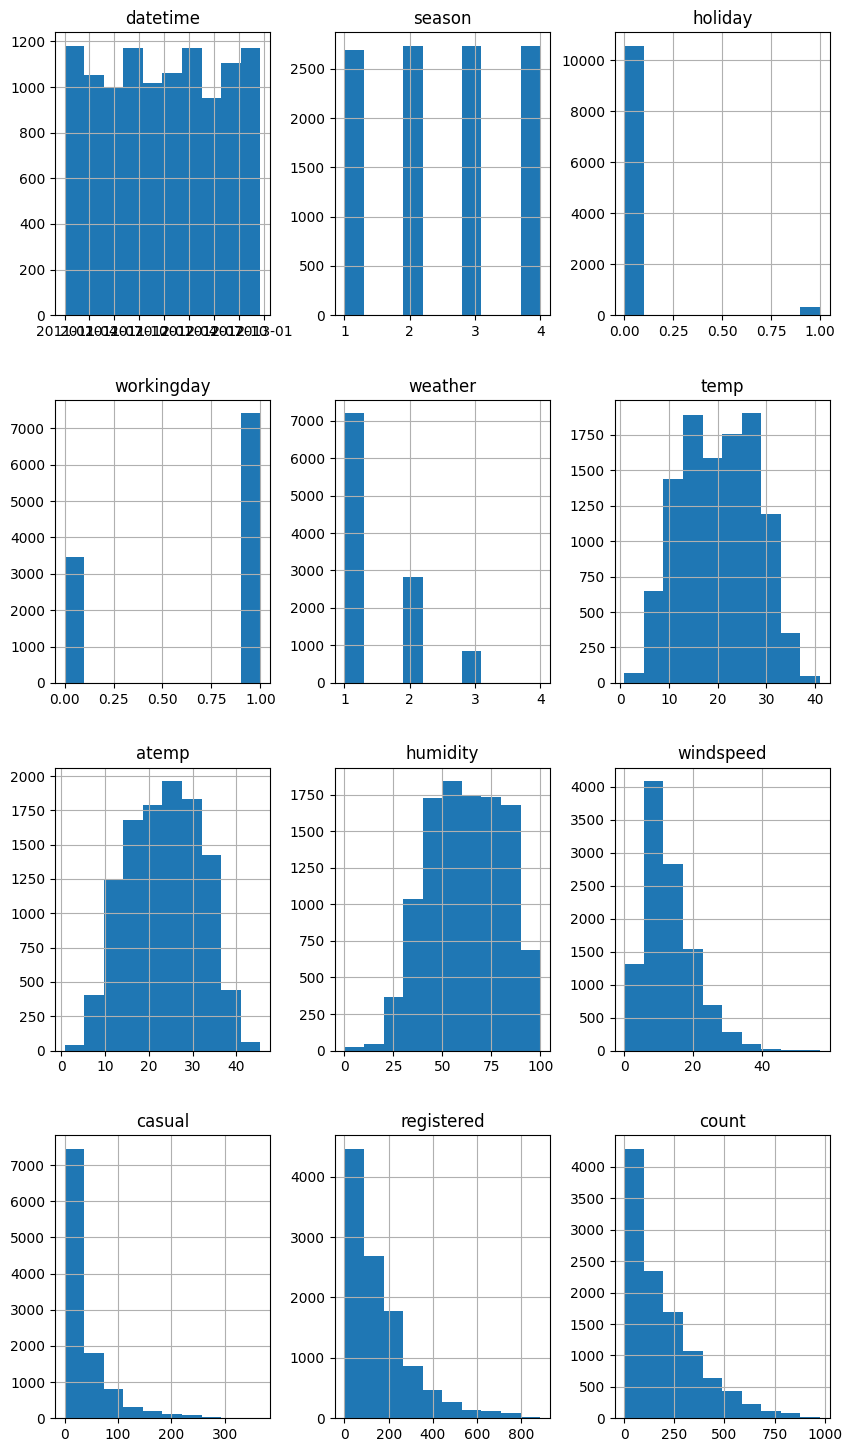

In [48]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(10,18))

In [ ]:
corr_matrix = train.corr()
corr_matrix

**CREATING NEW FEATURES**

Observation:

Variation is seen on hourly basis. So splitting the 'datetime' feature into year, month, day (dayofweek) and hour respectively.

In [54]:
# Splitting the 'datetime' feature in train data
train[["year", "month", "day", "hour"]] = train["datetime"].apply(lambda x: pd.Series([x.year, x.month, x.dayofweek, x.hour]))

# Drop 'datetime' feature
train.drop(["datetime"], axis=1, inplace=True)

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [55]:
# Splitting the 'datetime' feature in test data
test = pd.read_csv("/content/test.csv")
test["datetime"] = pd.to_datetime(test["datetime"])
test[["year", "month", "day", "hour"]] = test["datetime"].apply(lambda x: pd.Series([x.year, x.month, x.dayofweek, x.hour]))
test.drop(["datetime"], axis=1, inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train.info()

In [56]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [57]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
train.info()

array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

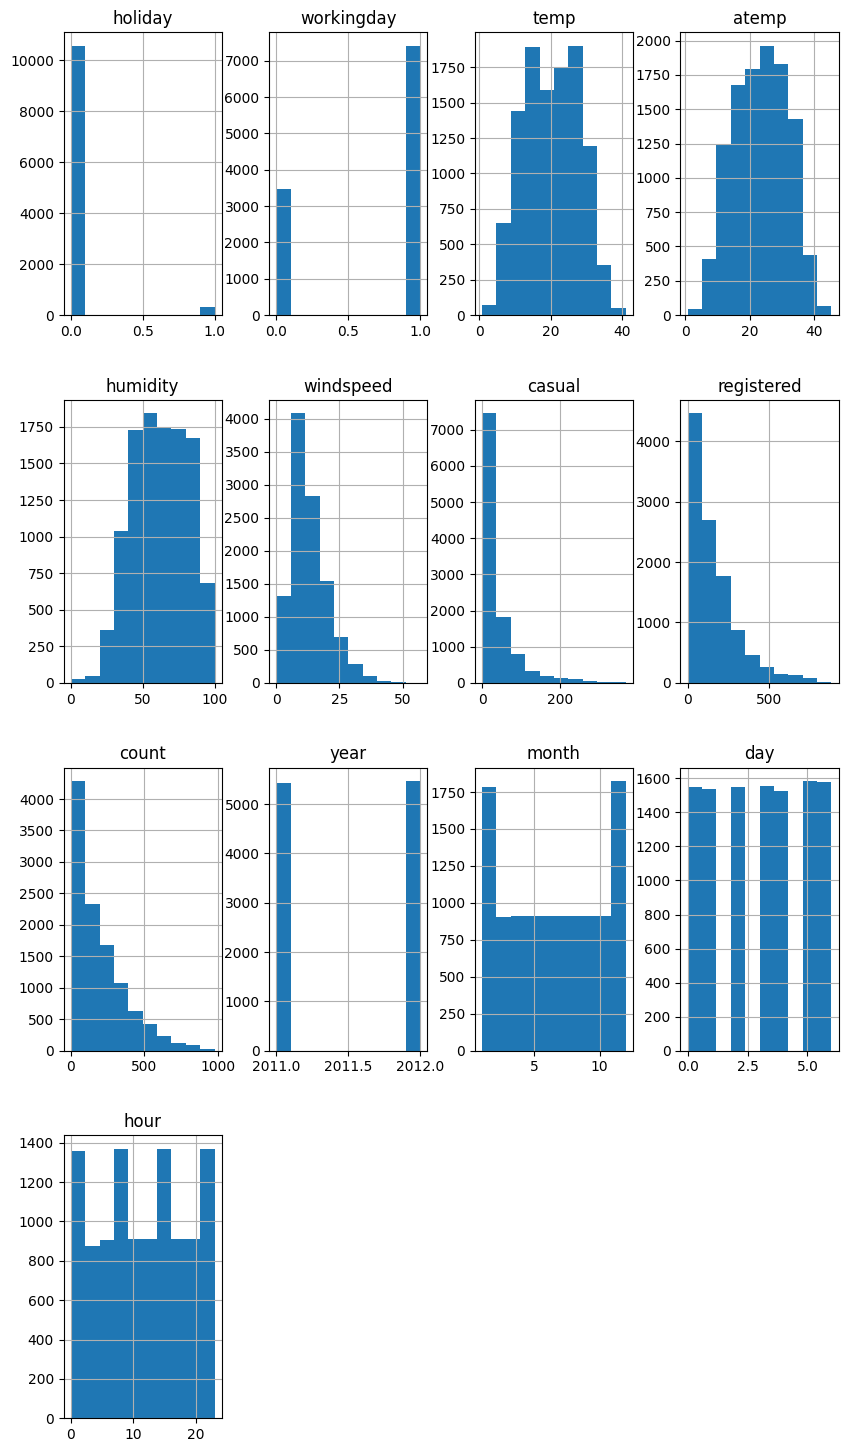

In [58]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10,18))

# **Creating a new feature 'day_type'**

We know that in the given data,

holiday - whether the day is considered a holiday (0: Non-holiday, 1: Holiday)

workingday - whether the day is neither a weekend nor holiday (0: Can-be-a-weekend-or-holiday, 1: No-weekend-No-holiday)

In [61]:
# Mapping 'day_type' categories in train data
train["day_type"] = train.apply(lambda row: "holiday" if row["holiday"] == 1 else ("weekday" if row["workingday"] == 1 else "weekend"), axis=1)

# Mapping 'day_type' categories in test data
test["day_type"] = test.apply(lambda row: "holiday" if row["holiday"] == 1 else ("weekday" if row["workingday"] == 1 else "weekend"), axis=1)

# Convert 'day_type' to category type
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


Observation:

New categorical feature day_type added with the following categories.

'holiday': when holiday is set to 1

'weekday': when holiday is set to 0 and workingday is set to 1

'weekend': when holiday is set to 0 and workingday is set to 0

In [62]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [ ]:
# Checking datatypes of variables
train.info()

In [63]:
print("(After EDA + Feature Engineering) Train Data Shape : ", train.shape)
print("(After EDA + Feature Engineering) Test Data Shape  : ", test.shape)

(After EDA + Feature Engineering) Train Data Shape :  (10886, 15)
(After EDA + Feature Engineering) Test Data Shape  :  (6493, 12)


<ipython-input-65-c442a9562894>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train[feature_numeric].corr()


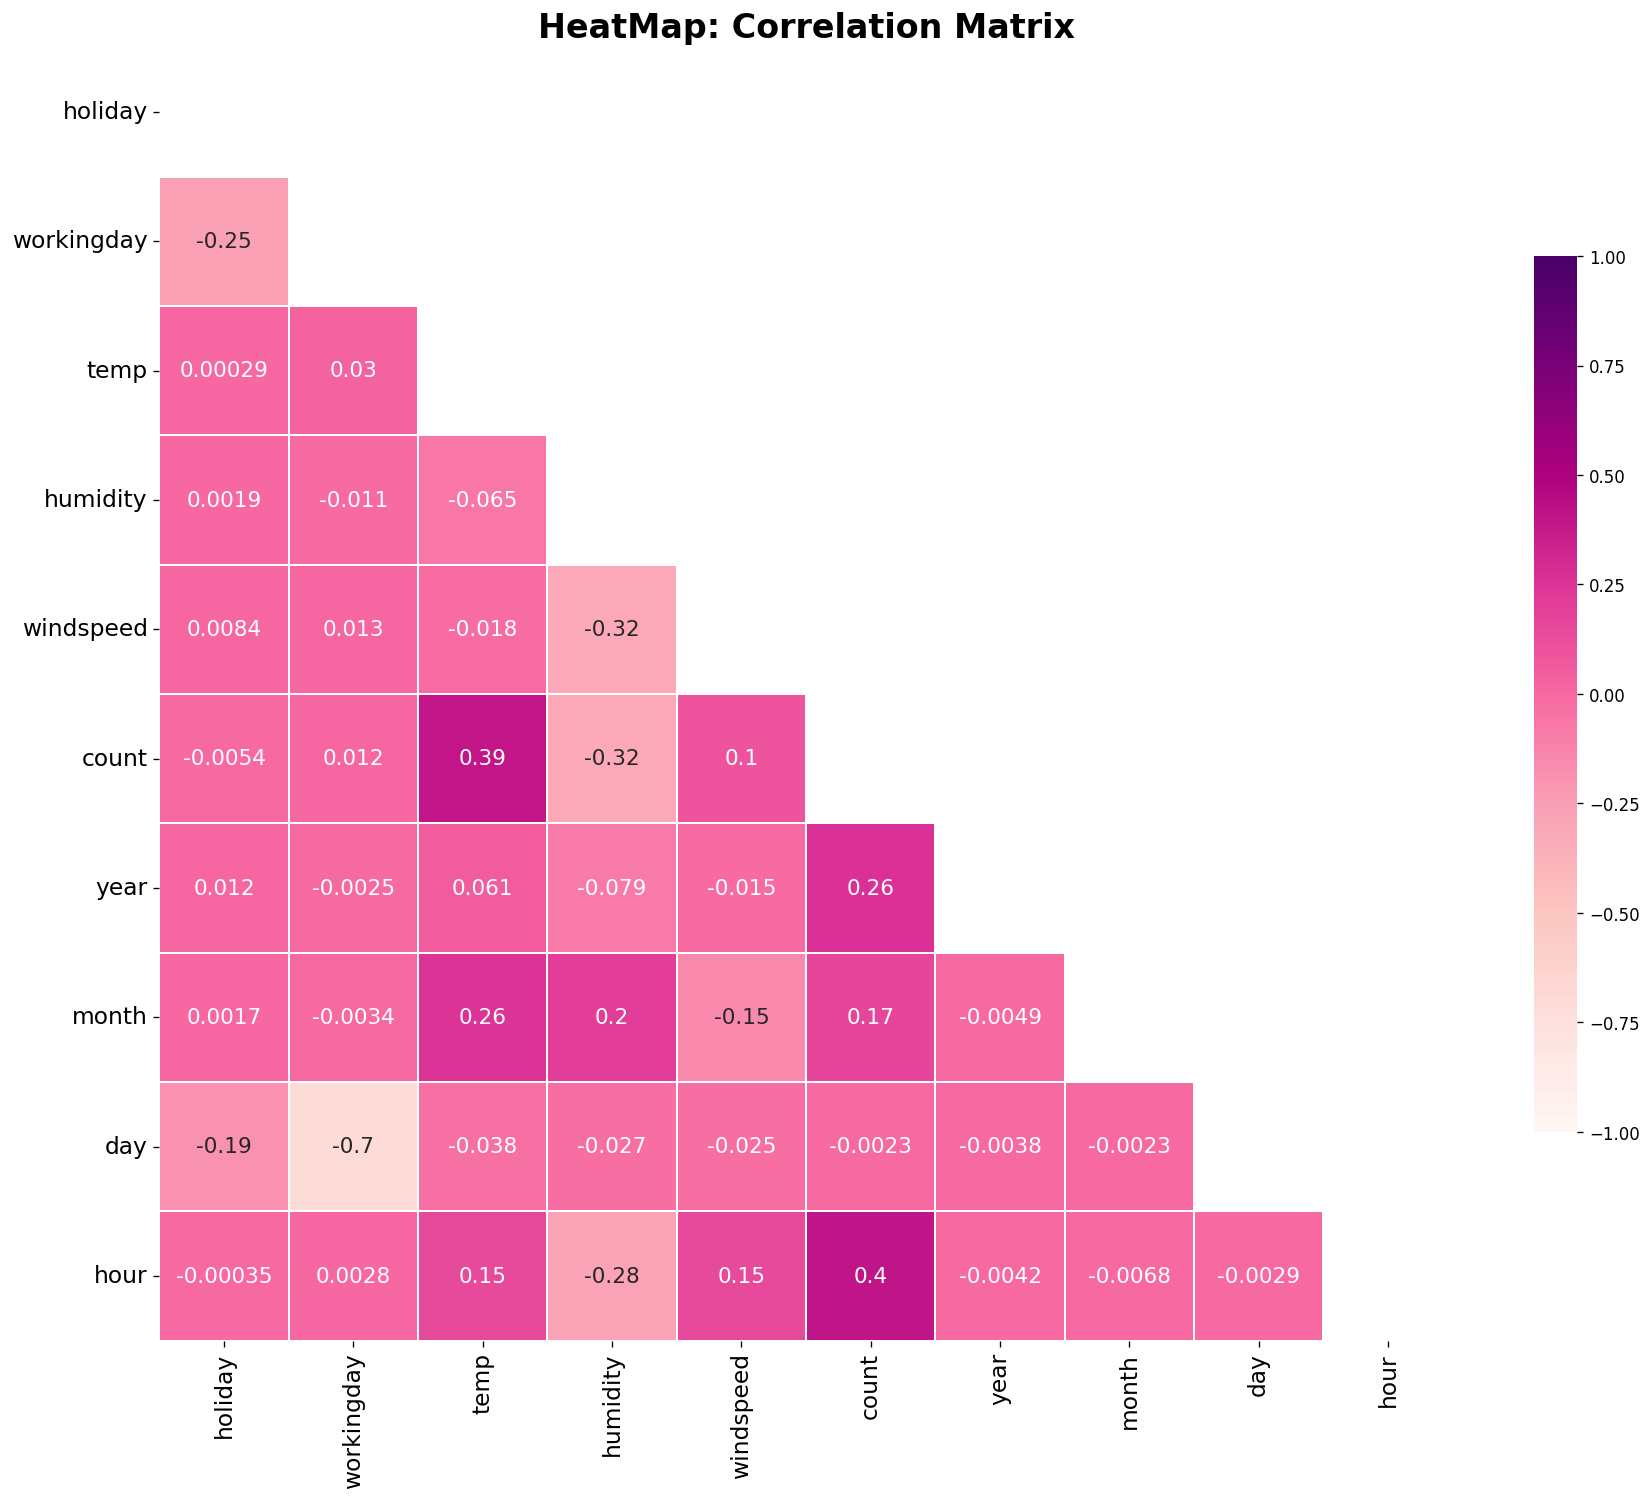

In [65]:
import seaborn as sns
import numpy as np

# Ignoring 'casual' and 'registered' features
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]

# Calculate correlation matrix
corr_matrix = train[feature_numeric].corr()

# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15), dpi=120)

# Plot heatmap using correlation matrix and mask
sns.heatmap(corr_matrix, mask=corr_mask, cmap='RdPu', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size": 13}, ax=ax)

# Customize the plot
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


## Step 5: Rerun the model with the same settings as before, just with more features

In [67]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
predictor_new_features = TabularPredictor(label='count' , eval_metric='rmse', problem_type='regression').fit(train_data=train.drop(['casual' , 'registered'], axis=1), time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230616_154209/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230616_154209/"
AutoGluon Version:  0.8.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   84.01 GB / 115.66 GB (72.6%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10655.99 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gene

In [68]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.008946      29.742674  474.319036                0.000576           0.237823            3       True         16
1      WeightedEnsemble_L2  -34.223390      28.063135  351.311541                0.000783           0.420519            2       True          9
2          CatBoost_BAG_L2  -34.244817      29.244033  463.354401                0.103585          63.379060            2       True         13
3     ExtraTreesMSE_BAG_L2  -34.343778      29.638512  410.702152                0.498065          10.726812            2       True         14
4          LightGBM_BAG_L2  -34.847722      29.272121  419.446872                0.131674          19.471531            2       True         11
5   RandomForestMSE_BAG_L2  -35.014853      29.660656  425.387912         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.8451720713065

In [ ]:
predictor_new_features.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(14, 7))

In [70]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    11.863667
1     5.742254
2     3.933347
3     3.127069
4     3.047306
Name: count, dtype: float32

In [71]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      190.008102
std       174.918533
min         1.467743
25%        44.508347
50%       147.126724
75%       281.749573
max       892.184021
Name: count, dtype: float64

In [72]:

negative_pred_count = (predictions < 0).sum()

# Counting the positive predictions
positive_pred_count = (predictions >= 0).sum()

print("Total predictions                :", len(predictions))
print("Total positive predictions  :", positive_pred_count)
print("Total negative predictions  :", negative_pred_count)

Total predictions                : 6493
Total positive predictions  : 6493
Total negative predictions  : 0


In [73]:
# Set negative predictions to zero
predictions = np.maximum(predictions, 0)

# Count negative predictions
pred_neg_count = (predictions < 0).sum()

print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [76]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [77]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,11.863667
1,2011-01-20 01:00:00,5.742254
2,2011-01-20 02:00:00,3.933347
3,2011-01-20 03:00:00,3.127069
4,2011-01-20 04:00:00,3.047306


In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 415kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-16 16:04:21  new features                         pending                              
submission.csv               2023-06-16 15:09:29  first raw submission                 complete  1.80210      1.80210       
submission_new_hpo1.csv      2023-06-13 17:41:49  new features with hyperparameters 1  complete  0.49469      0.49469       
submission_new_hpo.csv       2023-06-13 17:36:29  new features with hyperparameters    complete  0.55438      0.55438       


#### New Score of `0.44632 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [93]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"

In [94]:
from autogluon.tabular import TabularPredictor

hyperparameters = {
    'GBM': [{'extra_trees': True, 'num_boost_round': 100, 'num_leaves': 36, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
    'NN_TORCH': {'num_epochs': 5, 'learning_rate': 5e-4, 'activation': 'relu', 'dropout_prob': 0.1}
}

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'
hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)


Fitted model: NeuralNetTorch/834e0ed6 ...
	-117.517	 = Validation score   (-root_mean_squared_error)
	7.17s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/1ca10422 ...
	-77.699	 = Validation score   (-root_mean_squared_error)
	14.59s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: NeuralNetTorch/2aab3c63 ...
	-106.5665	 = Validation score   (-root_mean_squared_error)
	5.16s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/46d9a8f7 ...
	-98.8344	 = Validation score   (-root_mean_squared_error)
	2.63s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/5306ba9d ...
	-63.1612	 = Validation score   (-root_mean_squared_error)
	20.64s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: NeuralNetTorch/8d625320 ...
	-103.3998	 = Validation score   (-root_mean_squared_error)
	3.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/14ce7a78 ...
	

In [81]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L2  -34.734194       2.572922  126.269551                0.001171           0.442500            2       True          9
1              WeightedEnsemble_L3  -35.244220       2.881570  367.742440                0.001009           0.429090            3       True         17
2               LightGBM_BAG_L2/T1  -35.502453       2.572312  257.110345                0.000101          24.346633            2       True         13
3             LightGBMLarge_BAG_L1  -35.533254       2.571396   35.887266                2.571396          35.887266            1       True          8
4               LightGBM_BAG_L1/T2  -35.609017       0.000130   29.890723                0.000130          29.890723            1       True          6
5               LightGBM_B

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/0311b03e': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/fd09ca48': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L1/T3_FUL

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -37.498891       4.469204  53.484332                0.000626           0.390988            2       True          5
1             LightGBM/T16 -37.844296       2.440059  15.014877                2.440059          15.014877            1       True          2
2             LightGBM/T17 -38.014973       1.321544  11.506655                1.321544          11.506655            1       True          3
3             LightGBM/T13 -38.369670       0.514738   5.932837                0.514738           5.932837            1       True          1
4  NeuralNetTorch/5306ba9d -63.161203       0.192237  20.638975                0.192237          20.638975            1       True          4


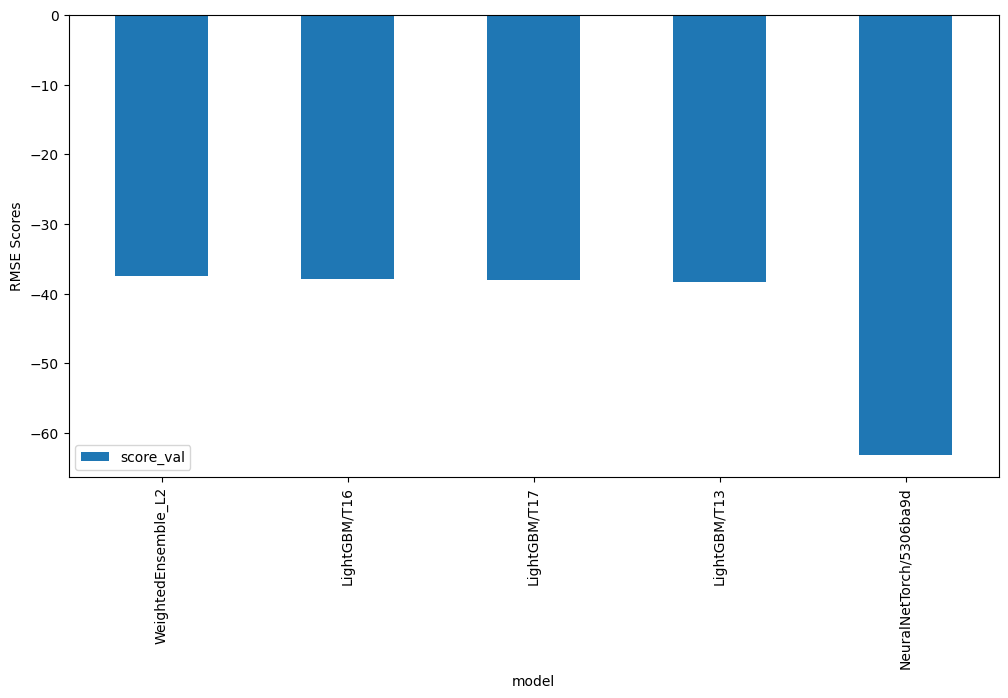

In [95]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
predictor_new_hpo.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [96]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.855352
1     1.882852
2     0.076203
3     1.503620
4     1.559369
Name: count, dtype: float32

In [97]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.149124
std       174.252655
min       -28.400721
25%        45.904953
50%       147.586105
75%       284.907837
max       923.624268
Name: count, dtype: float64

In [99]:
negative_pred_count = (predictions_new_hpo < 0).sum()

# Counting the positive predictions
positive_pred_count = (predictions_new_hpo >= 0).sum()

print("Total predictions                :", len(predictions_new_hpo))
print("Total positive predictions  :", positive_pred_count)
print("Total negative predictions  :", negative_pred_count)

Total predictions                : 6493
Total positive predictions  : 6389
Total negative predictions  : 104


In [100]:
# Set negative predictions to zero
predictions_new_hpo = np.maximum(predictions_new_hpo, 0)

# Count negative predictions
pred_neg_count = (predictions_new_hpo < 0).sum()

print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [101]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [102]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [103]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 288kB/s]
Successfully submitted to Bike Sharing Demand

In [104]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-16 16:56:47  new features with hyperparameters    complete  0.54838      0.54838       
submission_new_hpo.csv       2023-06-16 16:46:36  new features with hyperparameters    error                                
submission_new_features.csv  2023-06-16 16:04:21  new features                         complete  0.44632      0.44632       
submission.csv               2023-06-16 15:09:29  first raw submission                 complete  1.80210      1.80210       


#### New Score of `0.54838`

## Step 6_A: Hyper parameter optimization

In [105]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          # Lighter preset options (faster)

In [106]:
from autogluon.tabular import TabularPredictor
from autogluon.core import space

# Exclude 'NN_TORCH' family of models
excluded_model_types = ['NN_TORCH']

# Define hyperparameters for GBM
gbm_options = [
    {'extra_trees': True,
     'num_boost_round': space.Int(lower=100, upper=800, default=100),
     'num_leaves': space.Int(lower=26, upper=66, default=36),
     'ag_args': {'name_suffix': 'XT'}}
    , {}, 'GBMLarge'
]

# Define hyperparameters for XT models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# Define hyperparameters for XGB models
xgb_options = [
    {'objective': 'reg:squarederror',
     'eval_metric': 'rmse',
     'max_depth': space.Int(lower=5, upper=8, default=6),
     'n_estimators': space.Int(lower=100, upper=500, default=100),
     'eta': 0.3,
     'subsample': 1,
     'colsample_bytree': 1}
]

# Combine all hyperparameters
hyperparameters = {
    'GBM': gbm_options,
    'XT': xt_options,
    'XGB': xgb_options
}

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo1 = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    excluded_model_types=excluded_model_types,
    refit_full='best'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230616_170208/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230616_170208/"
AutoGluon Version:  0.8.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   82.51 GB / 115.66 GB (71.3%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10510.17 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitti

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-43.8633	 = Validation score   (-root_mean_squared_error)
	1.18s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-88.1544	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.4195	 = Validation score   (-root_mean_squared_error)
	1.97s	 = Training   runtime
	0.25s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-90.0782	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-58.3299	 = Validation score   (-root_mean_squared_error)
	1.35s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-40.3716	 = Validation score   (-root_mean_squared_error)
	1.87s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07
[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set

	Ran out of time, early stopping on iteration 2514. Best iteration is:
	[2504]	valid_set's rmse: 38.024
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.59s	 = Training   runtime
	0.27s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.3s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	1.93s	 = Training   runtime
	0.27s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	11.49s	 = Training   runtime
	1.51s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.36s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	2.83s	 = Training   runtime
	0.34s

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-41.7563	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-40.9482	 = Validation score   (-root_mean_squared_error)
	1.35s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-40.1906	 = Validation score   (-root_mean_squared_error)
	1.27s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-45.25	 = Validation score   (-root_mean_squared_error)
	1.19s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-44.6192	 = Validation score   (-root_mean_squared_error)
	2.79s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-40.6271	 = Validation score   (-root_mean_squared_error)
	4.39s	 = Training   runtime
	0.29s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-43.0461	 = Validation score   (-root_mean_squared_error)
	3.93s	 = Training   runtime
	0.13s	 = 

In [107]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.363414       5.215760  47.038694                0.000963           0.562497            2       True          8
1         LightGBM/T16 -38.024003       0.908017   5.586214                0.908017           5.586214            1       True          4
2          LightGBM/T4 -38.124006       1.514321  11.486078                1.514321          11.486078            1       True          1
3         LightGBM/T13 -38.369670       0.648654   5.523219                0.648654           5.523219            1       True          3
4         LightGBM/T12 -38.431862       1.377550  10.189639                1.377550          10.189639            1       True          2
5          XGBoost/T19 -38.740239       0.076413   2.251895                0.076413           2.251895        

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T19': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606130618,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'LightGBM/T16': -38.0240027569927,
  'ExtraTreesMSE': -39.584076050325685,
  'XGBoost/T8': -39.38480317646934,
  'XGBoost/T19': -38.7402388682388,
  'WeightedEnsemble_L2': -37.36341430154761},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': 'AutogluonModels/ag-20230616_170208/models/LightGBM/T4/',
  'LightGBM/T12': 'AutogluonModels/ag-20230616_170208/models/LightGBM/T12/',
  'LightGBM/T13': 'AutogluonModels/ag-20230616_170208/models/LightGBM/T13/',
  'LightGBM/T16': 'AutogluonModels/ag-20230616_170208/models/LightGBM/T16/',
  'ExtraTreesMSE': 'AutogluonMod

                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.363414       5.215760  47.038694                0.000963           0.562497            2       True          8
1         LightGBM/T16 -38.024003       0.908017   5.586214                0.908017           5.586214            1       True          4
2          LightGBM/T4 -38.124006       1.514321  11.486078                1.514321          11.486078            1       True          1
3         LightGBM/T13 -38.369670       0.648654   5.523219                0.648654           5.523219            1       True          3
4         LightGBM/T12 -38.431862       1.377550  10.189639                1.377550          10.189639            1       True          2
5          XGBoost/T19 -38.740239       0.076413   2.251895                0.076413           2.251895            1       True          7
6           XGBoost/T8 -39.384803 

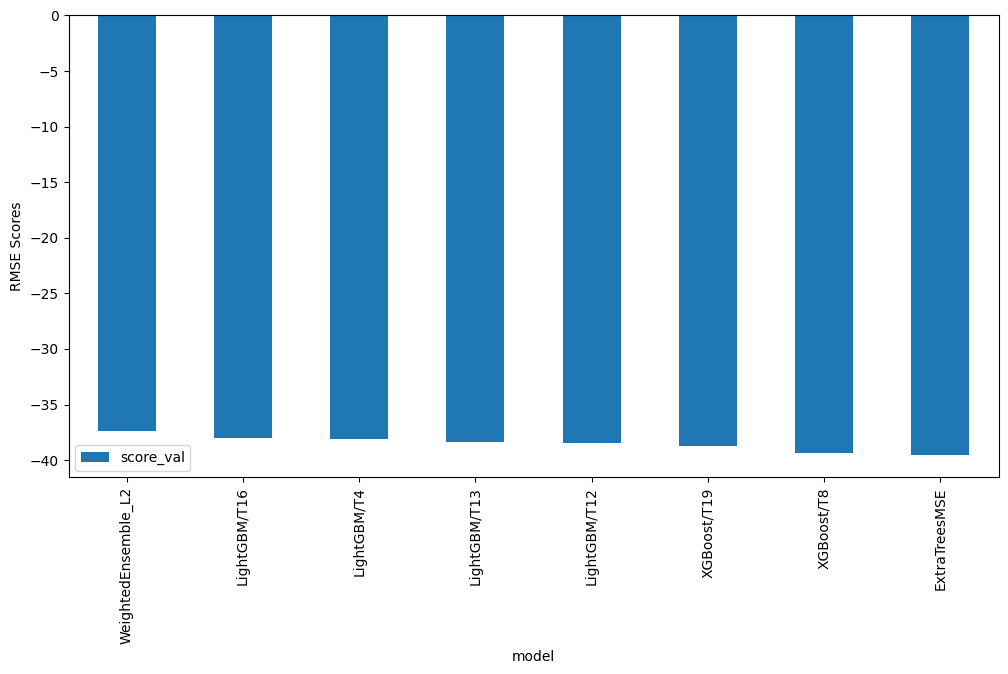

In [108]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
predictor_new_hpo1.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [109]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    16.212906
1     3.885297
2     2.063156
3     2.147296
4     2.165819
Name: count, dtype: float32

In [111]:
# Describe the `predictions_new_hpo1` series to see if there are any negative values
predictions_new_hpo1.describe()

count    6493.000000
mean      190.478912
std       173.543884
min       -15.046997
25%        47.502934
50%       149.548233
75%       283.789185
max       936.228577
Name: count, dtype: float64

In [110]:
negative_pred_count = (predictions_new_hpo1 < 0).sum()

# Counting the positive predictions
positive_pred_count = (predictions_new_hpo1>= 0).sum()

print("Total predictions                :", len(predictions_new_hpo1))
print("Total positive predictions  :", positive_pred_count)
print("Total negative predictions  :", negative_pred_count)

Total predictions                : 6493
Total positive predictions  : 6434
Total negative predictions  : 59


In [112]:
# Set negative predictions to zero
predictions_new_hpo1 = np.maximum(predictions_new_hpo1, 0)

# Count negative predictions
pred_neg_count = (predictions_new_hpo1 < 0).sum()

print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [113]:
# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [114]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,16.212906
1,2011-01-20 01:00:00,3.885297
2,2011-01-20 02:00:00,2.063156
3,2011-01-20 03:00:00,2.147296
4,2011-01-20 04:00:00,2.165819


In [115]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:00<00:00, 341kB/s]
Successfully submitted to Bike Sharing Demand

In [116]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-06-16 17:08:26  new features with hyperparameters 1  complete  0.50090      0.50090       
submission_new_hpo.csv       2023-06-16 16:56:47  new features with hyperparameters    complete  0.54838      0.54838       
submission_new_hpo.csv       2023-06-16 16:46:36  new features with hyperparameters    error                                
submission_new_features.csv  2023-06-16 16:04:21  new features                         complete  0.44632      0.44632       
submission.csv               2023-06-16 15:09:29  first raw submission                 complete  1.80210      1.80210       


#### New Score of `0.50090`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

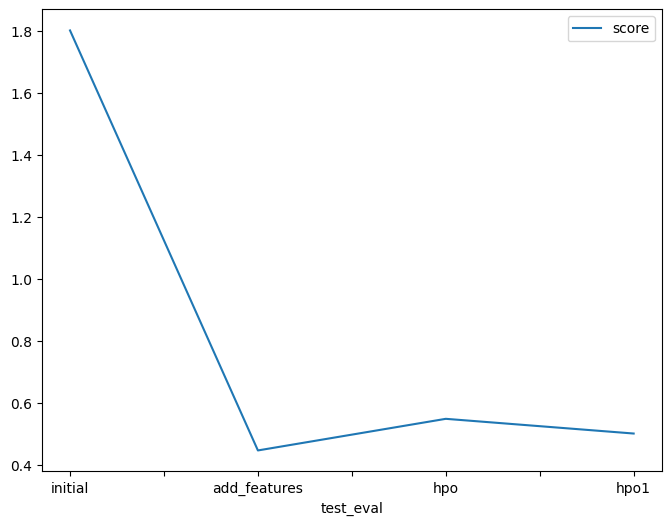

In [121]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1"],
        "score": [1.80210, 0.44632, 0.54838, 0.50090]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [123]:
# The 3 hyperparameters we tuned with the kaggle score as the result

# NOTE: Here the last 'hpo' based top-model is the 'hpo1' model with best Kaggle score within hyperparameter optimization category
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo1)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, & XGB)"],
    "hpo2": ["prescribed_values", "prescribed_values", "LightGBMXT"],
    "hpo3": ["presets: 'best quality'", "presets: 'best quality'", "presets: 'optimize_for_deployment"],
    "score": [1.80210, 0.44632, 0.50090]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'best quality',1.80210
1,add_features,prescribed_values,prescribed_values,presets: 'best quality',0.44632
2,hpo (top-hpo-model: hpo1),"Tree-Based Models: (GBM, XT, & XGB)",LightGBMXT,presets: 'optimize_for_deployment,0.50090


In [ ]:
!jupyter nbconvert --to html Udacity_bike_sharing_project.ipynb

# **Conclusion:**
The top-ranked model was the **(add_features) model** named **WeightedEnsemble_L3**, with  best Kaggle score of **0.44632 (on test dataset).**